In [14]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

import json
import pandas as pd    

# Load the JSON file
path1 = 'datasets/CNN 2020-07 to 2025-02-14.json'
df = pd.read_json(path1)

# Extract the "data" list from "fear_and_greed_historical"
data_list = df["fear_and_greed_historical"]["data"]

# Convert it into a DataFrame
data_df = pd.DataFrame(data_list)
data_df['Date'] = pd.to_datetime(data_df['x'], unit='ms')
data_df['Date'] = data_df['Date'].dt.strftime('%Y-%m-%d')
data_df

df = data_df[['Date', 'y', 'rating']]
df

,Date,y,rating
0,2020-07-14,50.000000,neutral
1,2020-07-15,50.000000,neutral
2,2020-07-16,50.000000,neutral
3,2020-07-17,50.000000,neutral
4,2020-07-20,50.000000,neutral
...,...,...,...
1155,2025-02-11,43.542857,fear
1156,2025-02-12,42.971429,fear
1157,2025-02-13,47.228571,neutral
1158,2025-02-14,47.228571,neutral


In [15]:
cryptoFGI = pd.read_csv('datasets/CryptoFEI.csv')
cryptoFGI

,Date,Fng_value,Fng_classification
0,17-02-2025,51,Neutral
1,16-02-2025,54,Neutral
2,15-02-2025,50,Neutral
3,14-02-2025,48,Neutral
4,13-02-2025,50,Neutral
...,...,...,...
2565,05-02-2018,11,Extreme Fear
2566,04-02-2018,24,Extreme Fear
2567,03-02-2018,40,Fear
2568,02-02-2018,15,Extreme Fear


In [16]:
gldSilverFGI = pd.read_csv('datasets/Gold-Silver-Ratio-since-1693.csv', delimiter=';')
gldSilverFGI['Date'] = pd.to_datetime(gldSilverFGI['DateTime'])
gldSilverFGI['Date'] = gldSilverFGI['Date'].dt.strftime('%Y-%m-%d')
gldSilverFGI = gldSilverFGI[gldSilverFGI['Date'] > '2020-07-14']
# Fix Gold/Silver Ratio format (replace commas with dots)
gldSilverFGI['Gold/Silver'] = gldSilverFGI['Gold/Silver'].astype(str).str.replace(',', '.').astype(float)
gldSilverFGI[['Date', 'Gold/Silver']]

,Date,Gold/Silver
13925,2020-07-15,92.019308
13926,2020-07-16,92.255217
13927,2020-07-17,91.861829
13928,2020-07-18,91.311732
13929,2020-07-19,90.769694
...,...,...
15594,2025-02-08,89.106967
15595,2025-02-09,89.538613
15596,2025-02-10,89.969752
15597,2025-02-11,90.363318


In [17]:
# S&P 500 ETF TRUST (SPY)
spy = yf.Ticker("SPY")
df_spy = pd.DataFrame(spy.history(start="2020-07-14"))
print("SPY historical data")
df_spy['Change'] = df_spy['Close'] - df_spy['Open']
df_spy['Change %'] = df_spy['Change'] / df_spy['Open'] * 100
df_spy.reset_index(inplace=True)
df_spy['Date'] = df_spy['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_spy[['Open', 'Close', 'Change', 'Change %']]

SPY historical data


Open       Close    Change  Change %
0     292.581730  297.830109  5.248378  1.793816
1     301.089341  300.566376 -0.522965 -0.173691
2     298.642515  299.576385  0.933871  0.312705
3     300.594339  300.444916 -0.149423 -0.049709
4     300.174116  302.873016  2.698901  0.899112
...          ...         ...       ...       ...
1183  565.530029  555.659973 -9.870056 -1.745275
1184  549.830017  559.390015  9.559998  1.738719
1185  557.450012  560.969971  3.519958  0.631439
1186  555.049988  564.520020  9.470032  1.706158
1187  545.109985  543.419983 -1.690002 -0.310030

[1188 rows x 5 columns]

In [18]:
# Vanguard Total Bond Market Index Fund (BND)
bnd = yf.Ticker("BND")
df_bnd = pd.DataFrame(bnd.history(start="2020-07-14"))
print("BND historical data")
df_bnd['Change'] = df_bnd['Close'] - df_bnd['Open']
df_bnd['Change %'] = df_bnd['Change'] / df_bnd['Open'] * 100
df_bnd.reset_index(inplace=True)
df_bnd['Date'] = df_bnd['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_bnd[['Open', 'Close', 'Change', 'Change %']]

BND historical data


,Open,Close,Change,Change %
0,77.485090,77.502571,0.017481,0.022560
1,77.528750,77.511269,-0.017481,-0.022548
2,77.616135,77.563705,-0.052429,-0.067550
3,77.694816,77.642380,-0.052436,-0.067490
4,77.773430,77.721001,-0.052429,-0.067413
...,...,...,...,...
1183,72.920948,73.080421,0.159473,0.218693
1184,73.259839,73.209999,-0.049840,-0.068031
1185,73.220001,73.440002,0.220001,0.300466
1186,73.610001,73.379997,-0.230003,-0.312462


In [19]:
# SPDR Gold Shares (GLD)
gld = yf.Ticker("GLD")
df_gld = pd.DataFrame(gld.history(start="2020-07-14"))
print("GLD historical data")
df_gld['Change'] = df_gld['Close'] - df_gld['Open']
df_gld['Change %'] = df_gld['Change'] / df_gld['Open'] * 100
df_gld.reset_index(inplace=True)
df_gld['Date'] = df_gld['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_gld[['Date', 'Open', 'Close', 'Change', 'Change %']]


GLD historical data


,Date,Open,Close,Change,Change %
0,2020-07-14,168.970001,170.190002,1.220001,0.722022
1,2020-07-15,169.619995,170.339996,0.720001,0.424479
2,2020-07-16,169.800003,168.729996,-1.070007,-0.630157
3,2020-07-17,169.940002,170.119995,0.179993,0.105915
4,2020-07-20,170.759995,170.940002,0.180008,0.105416
...,...,...,...,...,...
1183,2025-03-28,283.820007,284.059998,0.239990,0.084557
1184,2025-03-31,287.529999,288.140015,0.610016,0.212157
1185,2025-04-01,288.540009,287.570007,-0.970001,-0.336176
1186,2025-04-02,288.279999,288.160004,-0.119995,-0.041625


In [20]:
# 21Shares Crypto Basket Index ETP (HODL.PA)
hodl = yf.Ticker("HODL.PA")
df_hodl = pd.DataFrame(hodl.history(start="2022-05-05"))
print("hodl historical data")
df_hodl['Change'] = df_hodl['Close'] - df_hodl['Open']
df_hodl['Change %'] = df_hodl['Change'] / df_hodl['Open'] * 100
df_hodl.reset_index(inplace=True)
df_hodl['Date'] = df_hodl['Date'].dt.strftime('%Y-%m-%d')  # Ensure same format
df_hodl[['Open', 'Close', 'Change', 'Change %']]


hodl historical data


,Open,Close,Change,Change %
0,15.0100,15.0100,0.000000,0.000000
1,15.0100,15.0100,0.000000,0.000000
2,10.1300,9.9000,-0.230000,-2.270489
3,9.8700,9.8700,0.000000,0.000000
4,9.8700,9.8700,0.000000,0.000000
...,...,...,...,...
742,14.7298,14.5089,-0.220901,-1.499685
743,14.1492,13.7827,-0.366501,-2.590258
744,13.4707,13.5509,0.080200,0.595368
745,13.8173,13.9184,0.101100,0.731691


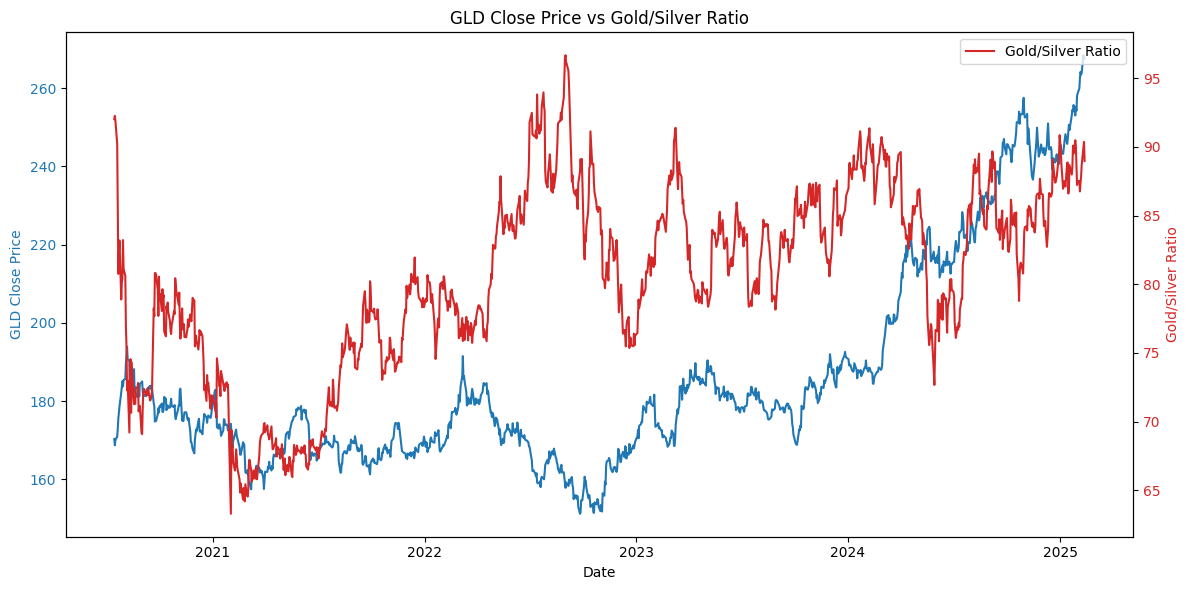

In [22]:
# Merge to fit both into the plot
merged_df = pd.merge(df_gld, gldSilverFGI, left_on='Date', right_on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GLD Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("GLD Close Price", color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Close'], label="GLD Close", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Gold/Silver Ratio
ax2 = ax1.twinx()
ax2.set_ylabel("Gold/Silver Ratio", color='tab:red')
ax2.plot(merged_df['Date'], merged_df['Gold/Silver'], label="Gold/Silver Ratio", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title("GLD Close Price vs Gold/Silver Ratio")
fig.tight_layout()
plt.legend()
plt.show()

## Gold Close Price vs Fear and Greed Index for gold
This currently shows that the gold price goes up when Gold/Silver ratio goes down ("fearful") and up when GS ratio increases, for example look at the huge negative correlation between 2022-2023

### Room for improvement
Not sure

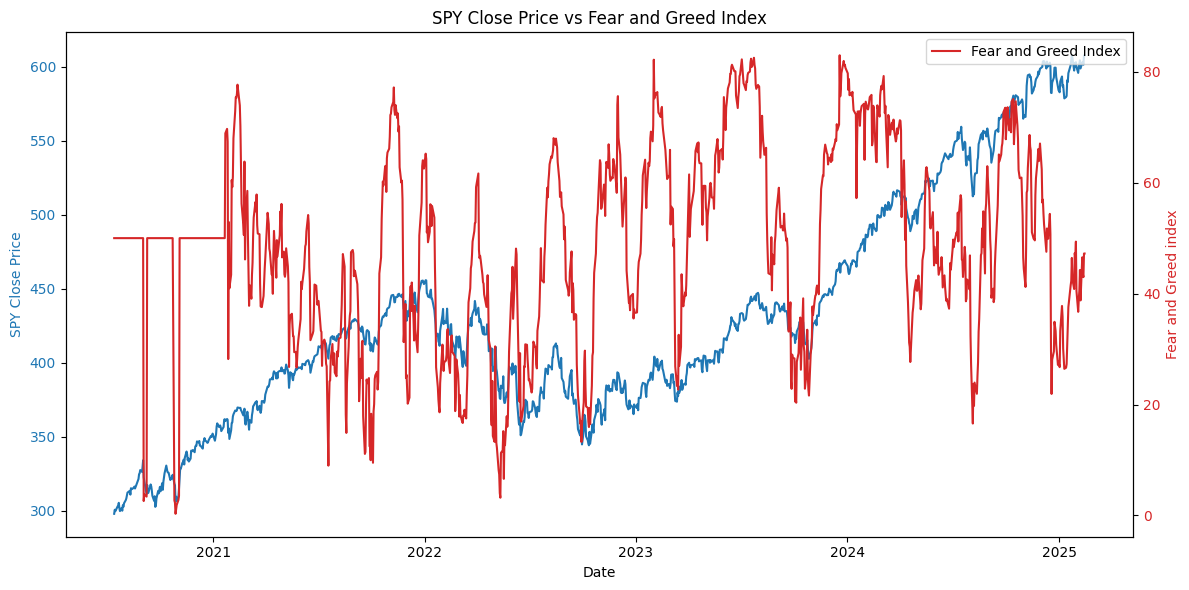

In [23]:
# Merge to fit both into the plot
merged_df = pd.merge(df_spy, df, left_on='Date', right_on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GLD Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY Close Price", color='tab:blue')
ax1.plot(merged_df['Date'], merged_df['Close'], label="SPY Close", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Gold/Silver Ratio
ax2 = ax1.twinx()
ax2.set_ylabel("Fear and Greed index", color='tab:red')
ax2.plot(merged_df['Date'], merged_df['y'], label="Fear and Greed Index", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title("SPY Close Price vs Fear and Greed Index")
fig.tight_layout()
plt.legend()
plt.show()

## SPY Close Price vs Fear and Greed Index
This currently shows that the market goes up when investors are greedy (high FG-value) and down when becoming fearful, for example look at the huge drop right before 2022. 

### Room for improvement
Make the SPY values normalized? It might not be great visualization since we cant follow larger changes.